# CIFAR datset

In [ ]:
from keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(X_train.shape)

(50000, 32, 32, 3)


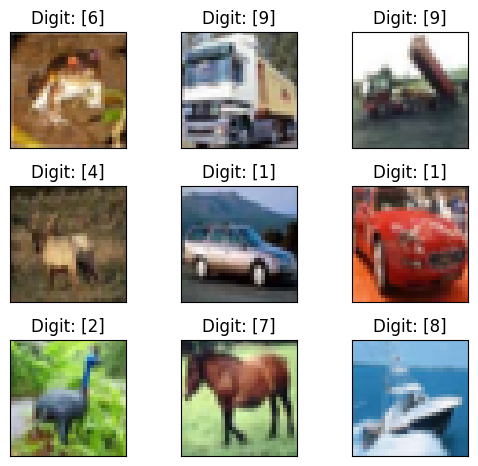

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.utils import to_categorical

# one-hot encode the labels
y_train_enc = to_categorical(y_train)
y_test_enc = to_categorical(y_test)
print(y_train_enc.shape)

(50000, 10)


In [ ]:
X_train_enc = X_train.reshape(X_train.shape[0], 3072)
X_test_enc = X_test.reshape(X_test.shape[0], 3072)
print(X_train_enc.shape)

# normalize the data
X_train_enc = X_train_enc.astype('float32')
X_test_enc = X_test_enc.astype('float32')
X_train_enc /= 255
X_test_enc /= 255

(50000, 3072)


In [ ]:
import tensorflow as tf


In [ ]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(10, activation='softmax')
# ])

## ANN

In [ ]:
input = tf.keras.Input(shape=(3072, ))
x = tf.keras.layers.Dense(128, activation='relu')(input)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)

# y = tf.keras.layers.Dense(128, activation='relu')(x)
output = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input, outputs=output)

# change the learning rate to 0.001

model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

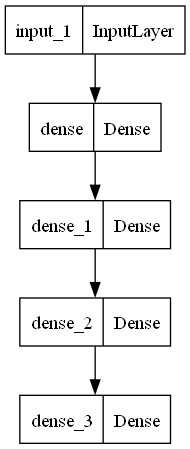

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
model.fit(X_train_enc, y_train_enc, epochs=10, validation_data=(X_test_enc, y_test_enc))


Epoch 1/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.9190 - accuracy: 0.2937 - val_loss: 1.7758 - val_accuracy: 0.3576
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7275 - accuracy: 0.3755 - val_loss: 1.6616 - val_accuracy: 0.4056
Epoch 3/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.6538 - accuracy: 0.4032 - val_loss: 1.6565 - val_accuracy: 0.4033
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6010 - accuracy: 0.4257 - val_loss: 1.5983 - val_accuracy: 0.4220
Epoch 5/10
1563/1563 [==============================] - 4s 2ms/step - loss: 1.5612 - accuracy: 0.4419 - val_loss: 1.5271 - val_accuracy: 0.4562
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5301 - accuracy: 0.4508 - val_loss: 1.5427 - val_accuracy: 0.4401
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5026 - accuracy: 0.4598 - val_loss: 1.5148 - val_accuracy:

## Batch Normalization and Skip Connection

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, Activation, BatchNormalization
from tensorflow.keras.models import Model

In [ ]:
def create_block(input_layer):
    # Define Block layers
    layer1 = Dense(64, activation='relu')(input_layer)
    layer2 = Dense(128, activation='relu')(layer1)
    layer3 = Dense(128, activation='relu')(layer2)
    # add a batch normalization layer
    layer3 = BatchNormalization()(layer3)
    layer4 = Dense(64, activation='relu')(layer3)

    # Skip connection from Layer 1 to Layer 4
    skip_connection = Add()([layer1, layer4])

    return skip_connection

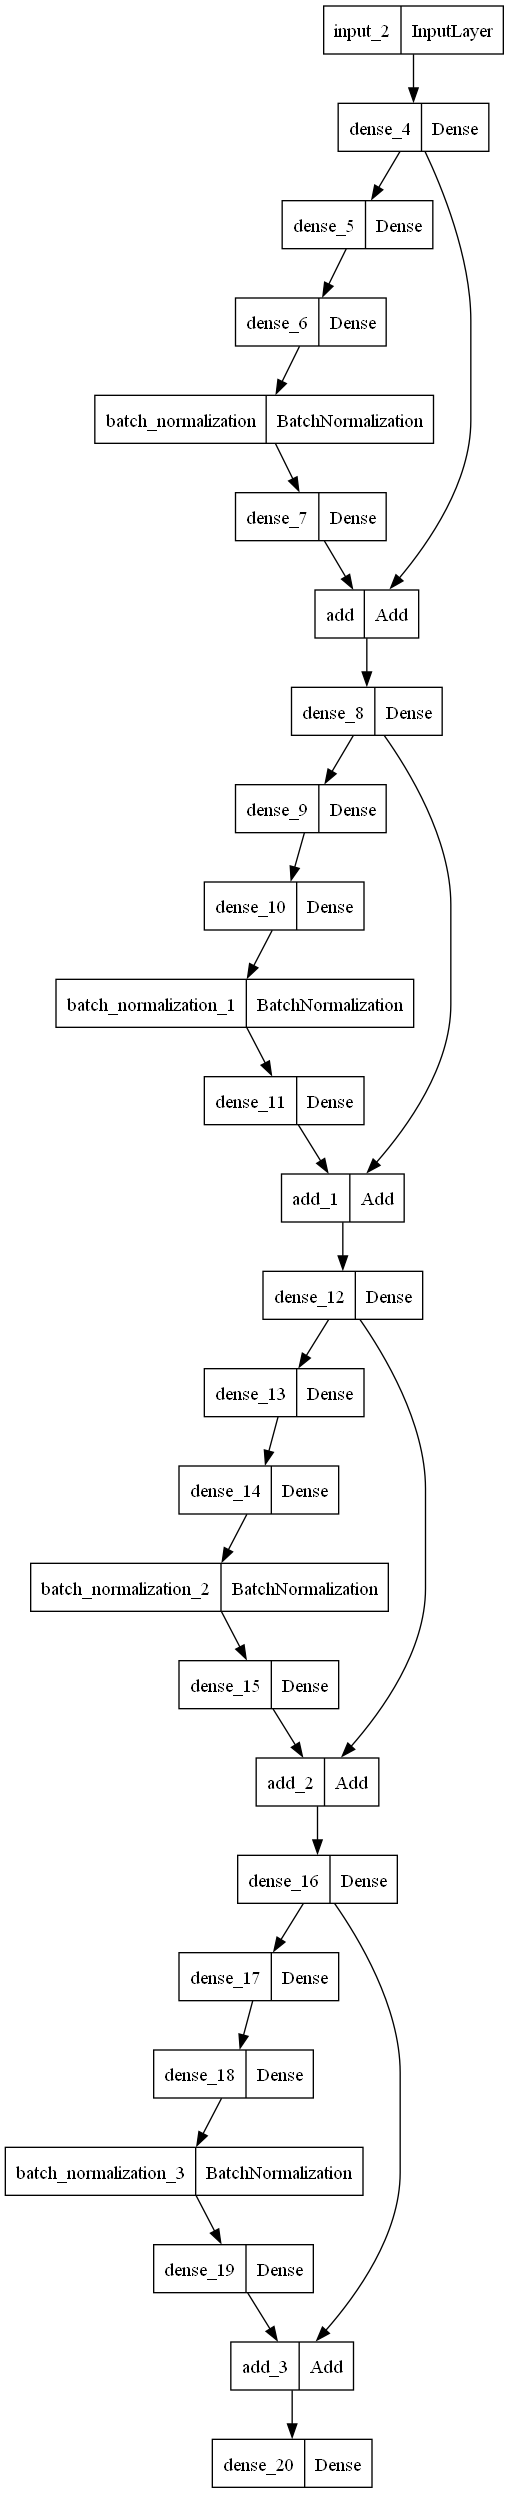

In [ ]:
input = Input(shape=(3072, ))
block1 = create_block(input)
block2 = create_block(block1)
block3 = create_block(block2)
block4 = create_block(block3)
output = Dense(10, activation='softmax')(block4)
model = Model(inputs=input, outputs=output)
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(X_train_enc, y_train_enc, epochs=10, validation_data=(X_test_enc, y_test_enc))

Epoch 1/10
1563/1563 [==============================] - 14s 6ms/step - loss: 1.8818 - accuracy: 0.3202 - val_loss: 1.8723 - val_accuracy: 0.3603
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6998 - accuracy: 0.3879 - val_loss: 1.8122 - val_accuracy: 0.3379
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6248 - accuracy: 0.4143 - val_loss: 1.6537 - val_accuracy: 0.4127
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5688 - accuracy: 0.4363 - val_loss: 1.5745 - val_accuracy: 0.4342
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5274 - accuracy: 0.4524 - val_loss: 1.8236 - val_accuracy: 0.3705
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4971 - accuracy: 0.4630 - val_loss: 1.6301 - val_accuracy: 0.4142
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4709 - accuracy: 0.4733 - val_loss: 1.6032 - val_accuracy

# CNN

In [ ]:
# implement CNN model
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

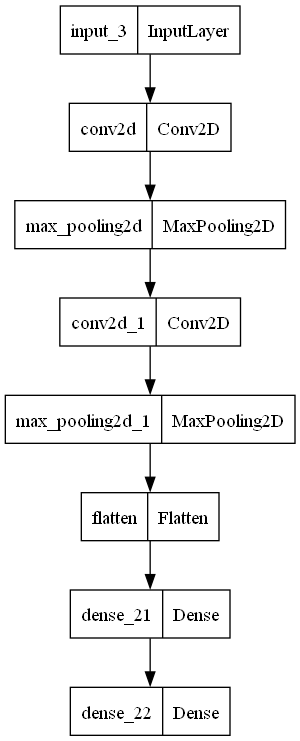

In [ ]:
input = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu')(input)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dense(64, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input, outputs=output)
tf.keras.utils.plot_model(model)

In [ ]:
model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train_enc, epochs=10, validation_data=(X_test, y_test_enc))

Epoch 1/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.9765 - accuracy: 0.3906 - val_loss: 1.4264 - val_accuracy: 0.4959
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.3346 - accuracy: 0.5265 - val_loss: 1.2708 - val_accuracy: 0.5470
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1894 - accuracy: 0.5825 - val_loss: 1.1934 - val_accuracy: 0.5804
Epoch 4/10
1563/1563 [==============================] - 22s 14ms/step - loss: 1.0846 - accuracy: 0.6213 - val_loss: 1.1067 - val_accuracy: 0.6197
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9990 - accuracy: 0.6522 - val_loss: 1.1008 - val_accuracy: 0.6260
Epoch 6/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.9224 - accuracy: 0.6801 - val_loss: 1.0792 - val_accuracy: 0.6318
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8621 - accuracy: 0.7013 - val_loss: 1.0863 -